# Exploratory Data Analysis
This file is a supplement to the main prediction, and performs basic exploratory data analysis on the data. Our goal is to gain a broad understanding of the data types, columns, distinct feautres, and difficulty groupings of all the datapoints.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Raw Data Sample

In [25]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('internship_assignment.csv')
df.head(3)

,user_id_hashed,dt,learning_goal,selected_track_id,selected_project_id,selected_project,topic,project,project_difficulty,step_id,step,step_difficulty,action
0,7956304405049214271,2023-03-07 17:20:18,Kotlin Basics,18,106,Sorting Tool (Kotlin),Introduction to Interfaces,NaN,NaN,18224,Introduction to Interfaces → Interesting detai...,medium,completed_submission
1,7956304405049214271,2023-03-07 17:23:19,Kotlin Basics,18,106,Sorting Tool (Kotlin),Introduction to Interfaces,NaN,NaN,18226,Introduction to Interfaces → Let's look at few...,medium,completed_submission
2,7956304405049214271,2023-03-07 17:27:17,Kotlin Basics,18,106,Sorting Tool (Kotlin),Introduction to Interfaces,NaN,NaN,18229,Introduction to Interfaces → Implementing an i...,hard,completed_submission


# Visualization 
The code creates a pie chart to visualize the distribution of actions. Only top 10 actions are labeled in the legend.

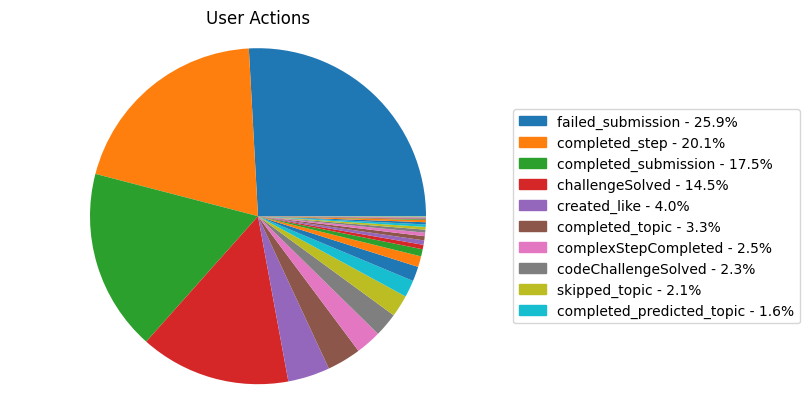

In [15]:

# Get the value counts for the 'action' column
action_counts = df['action'].value_counts()

# Create a pie chart
plt.pie(action_counts.values, labels=None, autopct=None)
plt.title('User Actions')
plt.axis('equal')

# Create a legend using the labels and percentages
legend_labels = ['{} - {:.1f}%'.format(label, 100*action_counts[label]/action_counts.sum()) for label in action_counts.index]
legend_handles = [plt.Rectangle((0,0),1,1, color=c) for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
plt.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
# Legend only contains top 10 most common actions

plt.show()


# Distinct Entries: 
Iterating over the columns of the dataframe and printing the # of distinct entries for each attribute.

In [23]:
# Iterate over the columns of the dataframe
for col in df.columns:
    # Calculate the number of distinct entries in the column
    num_unique = df[col].nunique()
    
    # Print the column name and the number of distinct entries
    print(f'The number of distinct entries in the "{col}" column is: {num_unique}')


The number of distinct entries in the "user_id_hashed" column is: 14
The number of distinct entries in the "dt" column is: 23886
The number of distinct entries in the "learning_goal" column is: 18
The number of distinct entries in the "selected_track_id" column is: 19
The number of distinct entries in the "selected_project_id" column is: 47
The number of distinct entries in the "selected_project" column is: 46
The number of distinct entries in the "topic" column is: 720
The number of distinct entries in the "project" column is: 46
The number of distinct entries in the "project_difficulty" column is: 4
The number of distinct entries in the "step_id" column is: 4234
The number of distinct entries in the "step" column is: 4143
The number of distinct entries in the "step_difficulty" column is: 3
The number of distinct entries in the "action" column is: 31


# Cross Tabulation
The code creates two cross tabulation tables with the action count by step and project difficulty.

In [30]:
cross_tab_step = pd.crosstab(df['action'], df['step_difficulty'])
cross_tab_project = pd.crosstab(df['action'], df['project_difficulty'])


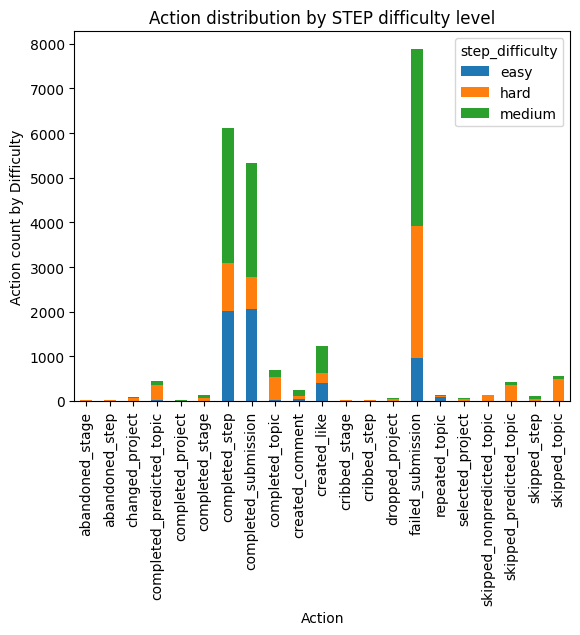

In [28]:
cross_tab_step.plot(kind='bar', stacked=True)

# Add chart title and axis labels
plt.title('Action distribution by STEP difficulty level')
plt.xlabel('Action')
plt.ylabel('Action count by Difficulty')

# Show the plot
plt.show()

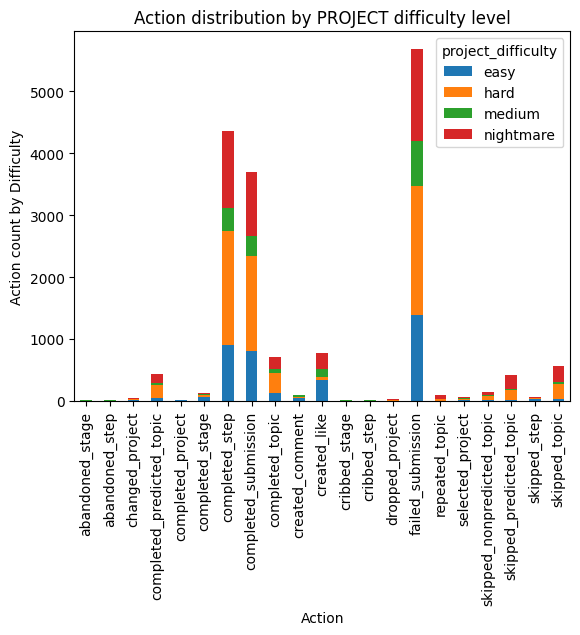

In [31]:
cross_tab_project.plot(kind='bar', stacked=True)

# Add chart title and axis labels
plt.title('Action distribution by PROJECT difficulty level')
plt.xlabel('Action')
plt.ylabel('Action count by Difficulty')

# Show the plot
plt.show()